In [9]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = pd.read_csv('./final_csv/reduced_iris.csv')
raisin = pd.read_csv('./final_csv/reduced_raisin.csv')

Number of columns: 5

Raisin Column: class  --  Species 


   Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        0            5.1           3.5            1.4           0.2
1        0            4.9           3.0            1.4           0.2
2        0            4.7           3.2            1.3           0.2
3        0            4.6           3.1            1.5           0.2
4        0            5.0           3.6            1.4           0.2


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

Accuracy: 0.74
Cross-Validation Scores: [0.66, 0.87, 0.81, 0.51]

Raisin Column: majoraxislength  --  SepalLengthCm 


   Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        0     442.246011           3.5            1.4           0.2
1        0     406.690687           3.0            1.4           0.2
2        0     442.267048           3.2            1.3           0.2
3        0     286.540559           3.1            1.5           0.2
4        0     352.190770           3.6            1.4           0.2


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.45
Cross-Validation Scores: [1.0, 0.5, 0.81, 0.51]

Raisin Column: perimeter  --  SepalWidthCm 


   Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        0     442.246011      1184.040            1.4           0.2
1        0     406.690687      1121.786            1.4           0.2
2        0     442.267048      1208.575            1.3           0.2
3        0     286.540559       844.162            1.5           0.2
4        0     352.190770      1073.251            1.4           0.2
Accuracy: 0.76
Cross-Validation Scores: [0.66, 0.45, 0.51, 0.49]

Raisin Column: convexarea  --  PetalLengthCm 


   Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        0     442.246011      1184.040          90546           0.2
1        0     406.690687      1121.786          78789           0.2
2        0     442.267048      1208.575          93717           0.2
3        0     286.540559       844.162          47336           0.2
4        0     35

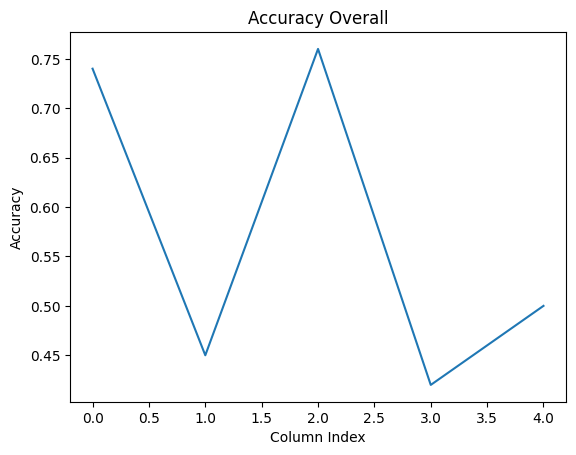

In [10]:
num_columns = iris.shape[1]
print("Number of columns:", num_columns)
iris = iris[['Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
iris_columns = iris.columns
raisin_columns = raisin.columns

accuracy_overall = []

data = iris

for index in range(num_columns):
    print("\nRaisin Column:", raisin_columns[index], " -- ", iris_columns[index], "\n\n")
    data[iris_columns[index]] = raisin[raisin_columns[index]]

    print(data.head())

    X = data.drop('Species', axis=1)
    y = data['Species']
#  usar stratified kfold
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

    rf_classifier = MLPClassifier()

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    accuracy_overall.append(accuracy)
    #f1_score = round(metrics.f1_score(y_test, y_pred), 2)
    #auc_score = round(roc_auc_score(y_test, y_pred), 2)
    cross_val_scores = cross_val_score(rf_classifier, X, y, cv=4)
    cross_val_scores = [round(score, 2) for score in cross_val_scores]


    print("Accuracy:", accuracy)
    #print("F1 Score:", f1_score)
    #print("AUC Score:", auc_score)
    print("Cross-Validation Scores:", cross_val_scores)

plt.plot(accuracy_overall)
plt.xlabel('Column Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Overall')
plt.show()
